In [7]:
import pandas as pd

# Load the CSV file
file_path = r"C:\Users\28640\Desktop\TCGA Breast.csv"
data = pd.read_csv(file_path, index_col=0)

# Transpose the data
transposed_data = data.T

# Create a new column for classification
def classify_sample(sample_name):
    # Extract the last two digits of the sample name (after the last '-')
    suffix = sample_name.split('-')[-1]
    if int(suffix) < 11:  # Cancer
        return "cancer"
    elif int(suffix) > 10:  # Normal
        return "normal"
    else:
        return "unknown"  # Optional: Handle other cases

transposed_data['Classification'] = transposed_data.index.map(classify_sample)

# Check counts for each classification
classification_counts = transposed_data['Classification'].value_counts()
print("Classification counts:")
print(classification_counts)

# Check for NaN data
nan_counts = transposed_data.isna().sum().sum()
if nan_counts > 0:
    print(f"There are {nan_counts} missing values in the data.")
else:
    print("No missing values found.")

# Save the updated DataFrame to a new CSV file
output_path = r"C:\Users\28640\Desktop\TCGA for ML.csv"
transposed_data.to_csv(output_path)

print(f"Transformed data saved to {output_path}")


Classification counts:
Classification
cancer    1104
normal     114
Name: count, dtype: int64
No missing values found.
Transformed data saved to C:\Users\28640\Desktop\TCGA for ML.csv


In [8]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

# Assume transposed_data is already created and includes a 'Classification' column
# Map string labels to integers ('cancer' -> 1, 'normal' -> 0)
transposed_data['Classification'] = transposed_data['Classification'].map({'cancer': 1, 'normal': 0})

# Drop rows with unknown or NaN classification
transposed_data = transposed_data.dropna(subset=['Classification'])

# Split features (X) and labels (y)
X = transposed_data.drop(columns=['Classification'])
y = transposed_data['Classification'].astype(int)

# Check for missing values in features and fill with median
X = X.fillna(X.median())

# Normalize features while retaining column names
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)




Training Logistic Regression...
Computing SHAP values for Logistic Regression...
Generating SHAP summary plot for Logistic Regression...


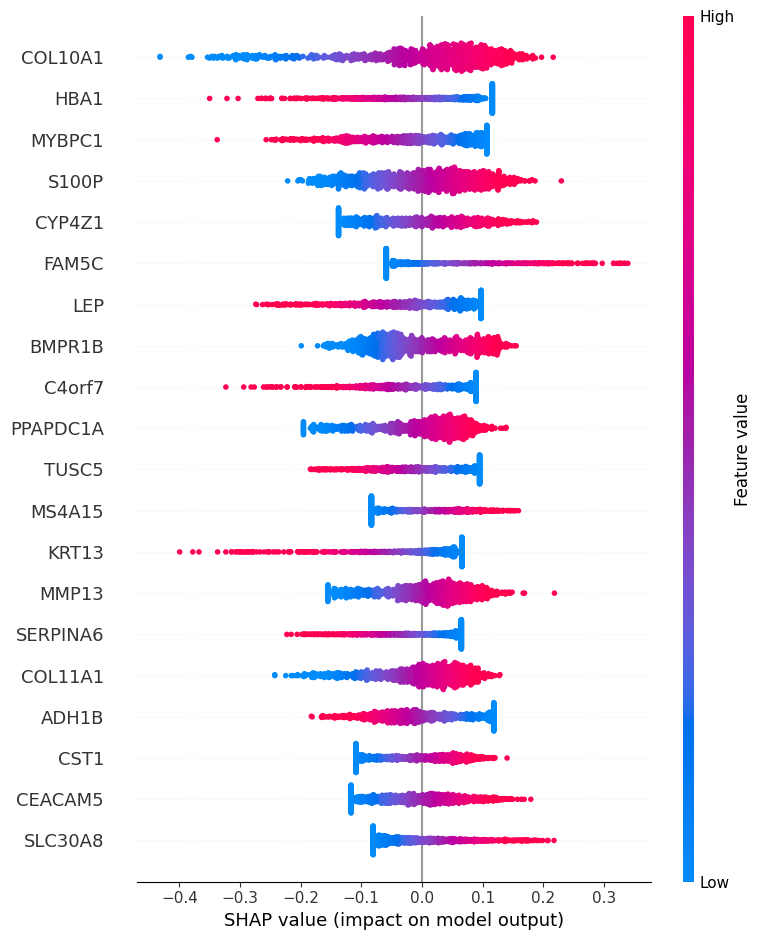

In [9]:
from sklearn.linear_model import LogisticRegression
import shap
import matplotlib.pyplot as plt

# Train Logistic Regression Model
print("Training Logistic Regression...")
logistic_model = LogisticRegression(random_state=42, max_iter=10000)
logistic_model.fit(X_train, y_train)

# Compute SHAP Values
print("Computing SHAP values for Logistic Regression...")
logistic_explainer = shap.Explainer(logistic_model, X_train)
logistic_shap_values = logistic_explainer(X_train)

# Generate SHAP Summary Plot
print("Generating SHAP summary plot for Logistic Regression...")
shap.summary_plot(logistic_shap_values, X_train, plot_type="dot")  # Use "dot" for the scatter plot format



Training XGBoost...


c:\Users\28640\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [19:29:10] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Computing SHAP values for XGBoost...
Shape of SHAP values (samples × features): (974, 20530)
Shape of X_train (samples × features): (974, 20530)
Generating SHAP summary plot for XGBoost...


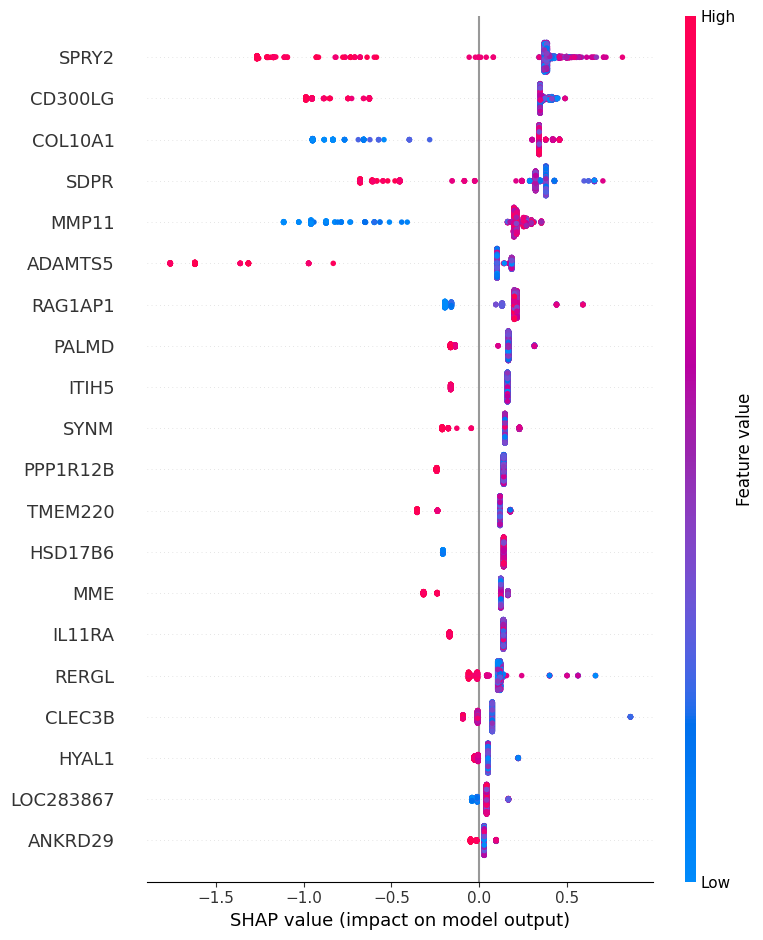

In [10]:
from xgboost import XGBClassifier
import shap
import matplotlib.pyplot as plt

# Train the XGBoost Model
print("Training XGBoost...")
xgb_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric="logloss")
xgb_model.fit(X_train, y_train)

# Compute SHAP Values using TreeExplainer
print("Computing SHAP values for XGBoost...")
xgb_explainer = shap.TreeExplainer(xgb_model)  # Use TreeExplainer for XGBoost
xgb_shap_values = xgb_explainer(X_train)  # Unified SHAP computation

# Debugging shapes
print("Shape of SHAP values (samples × features):", xgb_shap_values.values.shape)
print("Shape of X_train (samples × features):", X_train.shape)

# Generate SHAP Summary Plot
print("Generating SHAP summary plot for XGBoost...")
shap.summary_plot(xgb_shap_values, X_train, plot_type="dot")  # "dot" for scatter plot

